In [13]:
from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor
import pandas as pd
import numpy as np
import seaborn as sns

In [5]:
boston = load_boston()
df = pd.DataFrame(data=boston.data, columns=boston.feature_names)
df["PRICE"] = boston.target

y = df["PRICE"]
X = df.iloc[:,:-1]

rf = RandomForestRegressor()
neg_mse_scores = cross_val_score(rf, X, y, scoring="neg_mean_squared_error", cv =5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print("negative mse scores : ", np.round(neg_mse_scores, 2))
print("rmse scores : ",np.round(rmse_scores, 2))
print("avg socres : ", np.round(avg_rmse))

negative mse scores :  [ -7.86 -13.92 -19.99 -46.38 -19.26]
rmse scores :  [2.8  3.73 4.47 6.81 4.39]
avg socres :  4.0


In [11]:
def get_model_cv_prediction(model, X, y):
    neg_mse_scores = cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv =5)
    rmse_scores = np.sqrt(-1 * neg_mse_scores)
    avg_rmse = np.mean(rmse_scores)
    print("### {} ###".format(model.__class__.__name__))
    print("negative mse scores : ", np.round(neg_mse_scores, 2))
    print("rmse scores : ",np.round(rmse_scores, 2))
    print("avg socres : ", np.round(avg_rmse))
    


dt = DecisionTreeRegressor()
rf = RandomForestRegressor()
gb = GradientBoostingRegressor()
lgb = LGBMRegressor()


models = [dt, rf, gb, lgb]
for model in models:
    get_model_cv_prediction(model, X, y )

### DecisionTreeRegressor ###
negative mse scores :  [-13.67 -34.5  -26.68 -54.67 -57.49]
rmse scores :  [3.7  5.87 5.17 7.39 7.58]
avg socres :  6.0
### RandomForestRegressor ###
negative mse scores :  [ -7.7  -12.82 -23.05 -47.66 -20.39]
rmse scores :  [2.78 3.58 4.8  6.9  4.52]
avg socres :  5.0
### GradientBoostingRegressor ###
negative mse scores :  [ -7.48 -13.18 -19.42 -37.69 -14.97]
rmse scores :  [2.74 3.63 4.41 6.14 3.87]
avg socres :  4.0
### LGBMRegressor ###
negative mse scores :  [ -9.   -15.73 -18.18 -43.95 -24.96]
rmse scores :  [3.   3.97 4.26 6.63 5.  ]
avg socres :  5.0


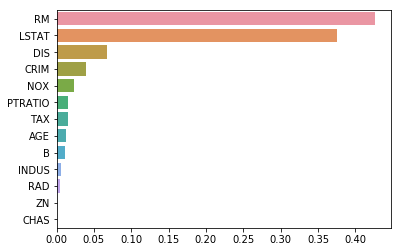

In [14]:
rf.fit(X, y)

feature_series = pd.Series(data=rf.feature_importances_,index=X.columns)
feature_series = feature_series.sort_values(ascending=False)
sns.barplot(x = feature_series, y=feature_series.index)

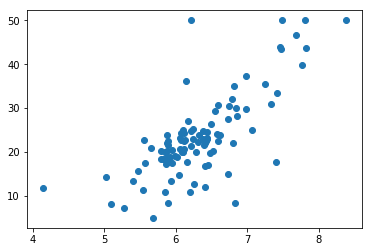

In [17]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt


df_sample = df[["RM","PRICE"]]
df_sample = df_sample.sample(n=100)

plt.scatter(df_sample.RM,df_sample.PRICE)

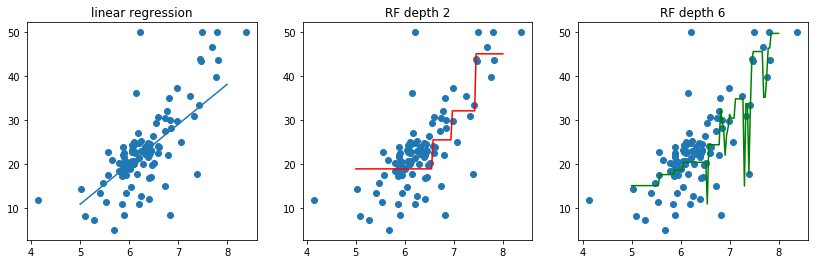

In [23]:

lr = LinearRegression()
rf_dep2 = DecisionTreeRegressor(max_depth=2)
rf_dep6 = DecisionTreeRegressor(max_depth=6)


X_train = df["RM"].values.reshape(-1, 1)
y_train = df["PRICE"].values.reshape(-1, 1)

lr.fit(X_train, y_train)
rf_dep2.fit(X_train, y_train)
rf_dep6.fit(X_train, y_train)


X_test = np.linspace(5, 8, 100).reshape(-1, 1)

pred_lr = lr.predict(X_test)
pred_rf_dep2 = rf_dep2.predict(X_test)
pred_rf_dep6 = rf_dep6.predict(X_test)


fig, (ax1, ax2, ax3) = plt.subplots(figsize=(14, 4), ncols=3)

ax1.set_title("linear regression")
ax1.scatter(df_sample.RM,df_sample.PRICE)
ax1.plot(X_test, pred_lr)

ax2.set_title("RF depth 2")
ax2.scatter(df_sample.RM,df_sample.PRICE)
ax2.plot(X_test, pred_rf_dep2, color="red")

ax3.set_title("RF depth 6")
ax3.scatter(df_sample.RM,df_sample.PRICE)
ax3.plot(X_test, pred_rf_dep6, color="green")